In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


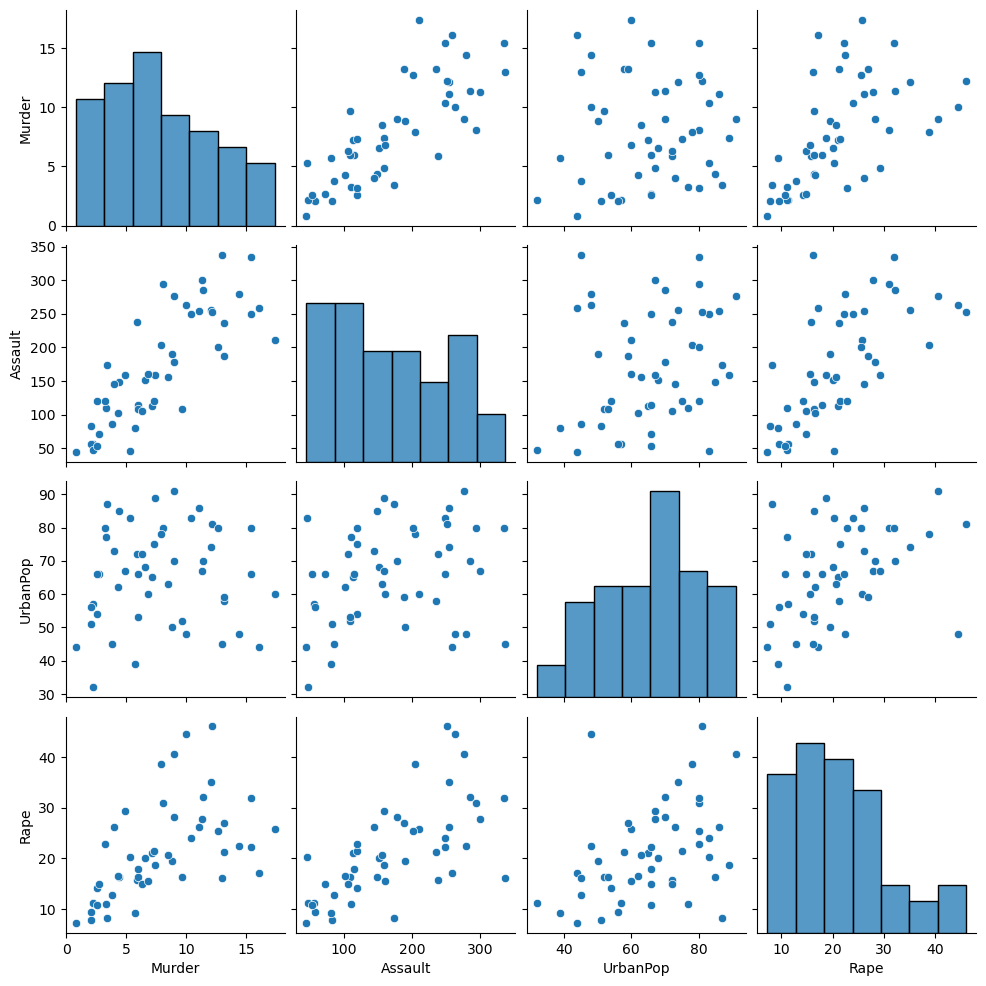

In [7]:
sns.pairplot(data = df)

In [8]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [9]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [10]:
df.iloc[:,1:5] = SS.fit_transform(df.iloc[:,1:5])
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814


In [11]:
X = df.iloc[:,1:]
X.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [12]:
import scipy.cluster.hierarchy as shc

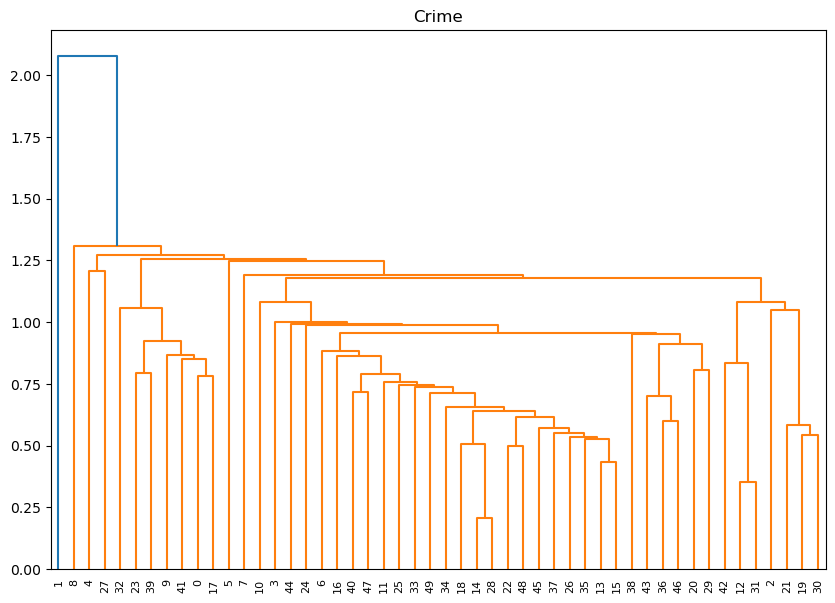

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title('Crime')
dend = shc.dendrogram(shc.linkage(X,method='single'))
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')

In [15]:
Y = cluster.fit_predict(X)
Y = pd.DataFrame(Y)
Y.value_counts()

0    46
1     2
2     1
3     1
dtype: int64

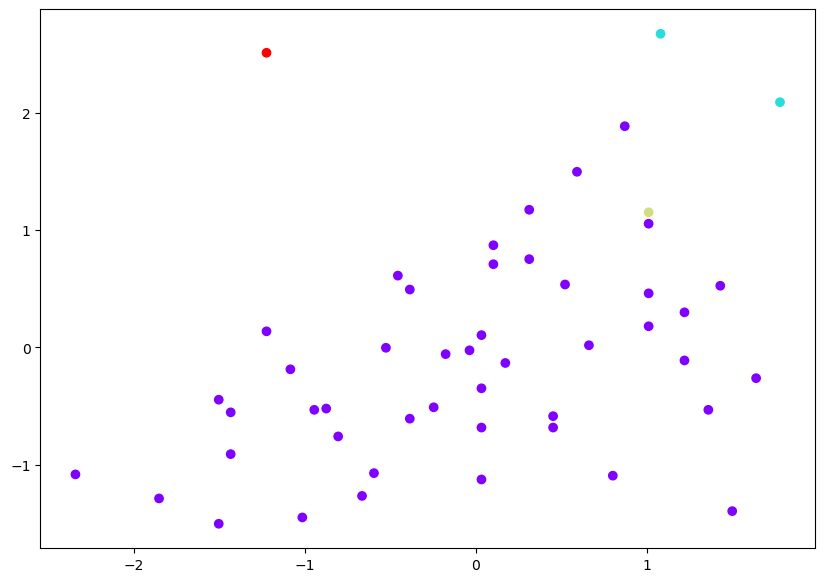

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,2],X.iloc[:,3], c=cluster.labels_, cmap='rainbow')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [18]:
Y = cluster.fit_predict(X)
Y = pd.DataFrame(Y)
Y.value_counts()

0    21
2    11
3    10
1     7
4     1
dtype: int64

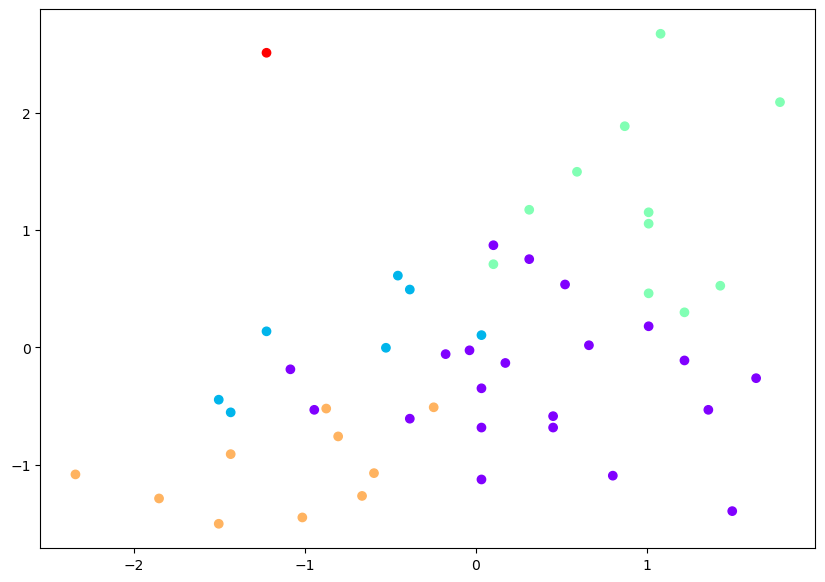

In [19]:
plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,2],X.iloc[:,3], c=cluster.labels_, cmap='rainbow')
plt.show()

In [20]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [21]:
Y = cluster.fit_predict(X)
Y = pd.DataFrame(Y)
Y.value_counts()

0    19
1    19
2    12
dtype: int64

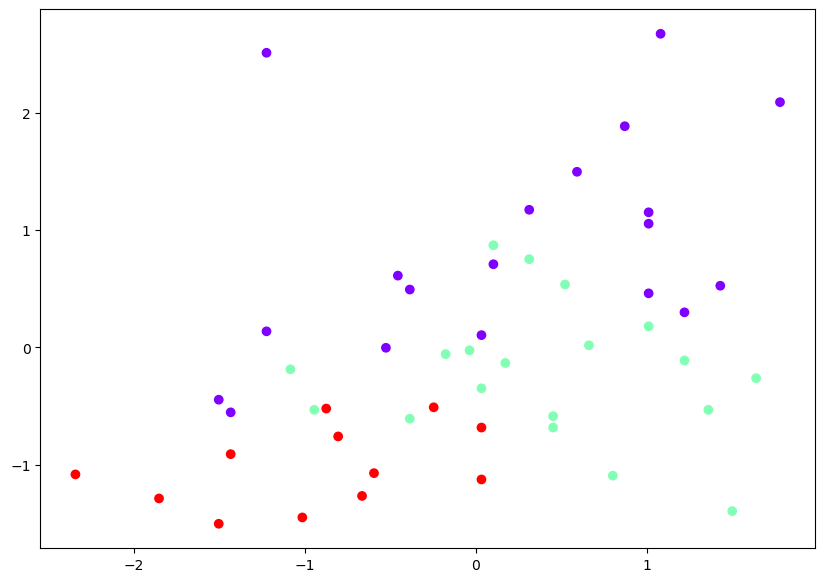

In [22]:
plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,2],X.iloc[:,3], c=cluster.labels_, cmap='rainbow')
plt.show()

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [24]:
kmeans = kmeans.fit(X)
Y = kmeans.predict(X)
Y = pd.DataFrame(Y)
Y.value_counts()

0    16
1    13
3    13
2     8
dtype: int64

In [25]:
p1 = kmeans.inertia_
int(p1)

57

In [26]:
clust = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    clust.append(int(kmeans.inertia_))

print(clust)

[200, 104, 80, 57, 50, 43, 40, 34, 32, 28]


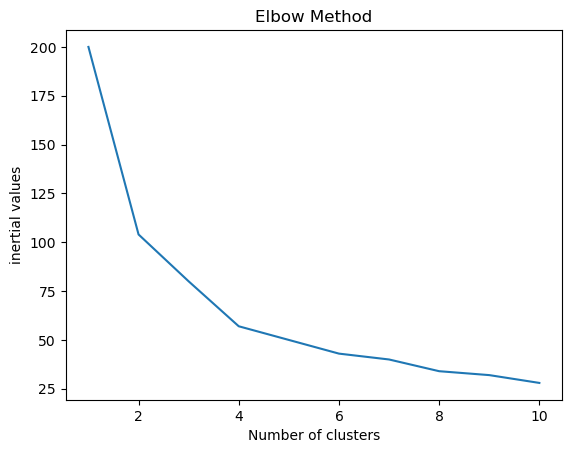

In [27]:
plt.plot(range(1, 11), clust)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertial values')
plt.show()

In [28]:
from sklearn.cluster import DBSCAN
DBSCAN()

DBSCAN()

In [29]:
dbscan = DBSCAN(eps=2, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=4)

In [30]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [31]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl.value_counts()

cluster
 0         49
-1          1
dtype: int64

In [32]:
df_new = pbd.concat([df,cl],axis=1)

In [33]:
noisedata = df_new[df_new['cluster']==-1]
print(noisedata)

  Unnamed: 0    Murder  Assault  UrbanPop      Rape  cluster
1     Alaska  0.513019  1.11806 -1.224067  2.509424       -1


In [34]:
finaldata = df_new[df_new['cluster']==0]
finaldata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,1.255179,0.790787,-0.526195,-0.003451,0
2,Arizona,0.072361,1.493817,1.009122,1.053466,0
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794,0
4,California,0.281093,1.275635,1.776781,2.088814,0
5,Colorado,0.025976,0.402909,0.869548,1.883901,0
6,Connecticut,-1.040880,-0.736484,0.799761,-1.092723,0
7,Delaware,-0.437875,0.815030,0.450825,-0.585834,0
8,Florida,1.765415,1.990786,1.009122,1.150530,0
9,Georgia,2.229265,0.487757,-0.386621,0.492653,0
10,Hawaii,-0.577030,-1.512241,1.218484,-0.111300,0


# Conclusion

 - The best numer of clusters for the data set is 4. Concluded this after comparing above clustering method results.